In [122]:
# IMPORTING THE REQUIRED LIBRARIES:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [123]:
df = pd.read_csv('/content/mlb.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [124]:
df.shape

(322, 20)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [126]:
print(df.isnull().sum())

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


In [127]:
# drop missing cases
df = df.dropna()

In [128]:
y = df['Salary']

In [129]:
df.drop(['League','Division','NewLeague'], axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [130]:
X=df.drop('Salary',axis=1)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(197, 16)
(66, 16)
(197,)
(66,)


**Lasso Regression**

In [132]:
reg = Lasso(alpha=1,max_iter=4000)
reg.fit(X_train, y_train)

Lasso(alpha=1, max_iter=4000)

In [133]:
print('Coefficient is:',reg.coef_)

Coefficient is: [-2.28846436  8.9008322   3.69481829 -2.05897395 -1.06775709  6.75708309
  0.7936048  -0.18407791 -0.02177752 -0.53437267  1.61721736  0.97549583
 -0.74106732  0.23403311  0.39935109 -2.19096376]


In [134]:
print('Interception is:',reg.intercept_)

Interception is: 78.10671956780914


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.038e+07, tolerance: 4.297e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, 

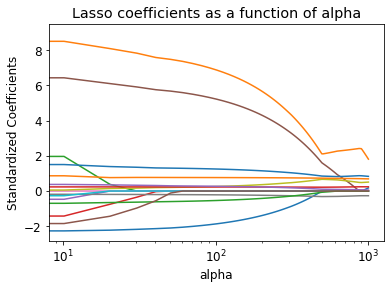

In [135]:
alphas = np.linspace(0,1000,100)
lasso = Lasso(max_iter=4000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [136]:
#  Provide the top five predictions based on training and test datasets
reg.predict(X_test[0:5])

array([556.27459049, 332.21689548, 191.97702833, 825.74694192,
       580.82444854])

In [137]:
reg.predict(X_train[0:5])

array([ 208.24734661,  234.11557151,  216.38931975, 1338.64113274,
       1281.64170992])

In [138]:
# Provide the mean squared error and R2 based on test dataset
from sklearn.metrics import mean_squared_error

# Test data
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))


R squared test set 53.77
MSE test set 71442.42


In [139]:
# Use the LassoCV algorithm to find the optimal alpha value using cross-validation= 10 with max_iter=100000
model = LassoCV(cv=10, random_state=0, max_iter=100000)
model.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, random_state=0)

In [140]:
model.alpha_

592.56810166164

In [141]:
#Generating optimal Model:
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e+04, tolerance: 4.297e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=592.56810166164)

In [142]:
# tuned model coefficients
print(list(zip(lasso_best.coef_, X)))

[(-0.0, 'AtBat'), (2.226225411540876, 'Hits'), (0.0, 'HmRun'), (0.0, 'Runs'), (0.0, 'RBI'), (1.0989691772891257, 'Walks'), (0.0, 'Years'), (-0.3076586739637752, 'CAtBat'), (0.6407933863337667, 'CHits'), (0.0, 'CHmRun'), (0.8273502265574445, 'CRuns'), (0.7209862891103438, 'CRBI'), (-0.017558407988243412, 'CWalks'), (0.22241042178653328, 'PutOuts'), (0.09469581447068703, 'Assists'), (-0.0, 'Errors')]


In [143]:
# Predictions of the tuned model
lasso_best.predict(X_test)

array([ 465.9008115 ,  446.87783847,  234.82578233,  847.01989366,
        456.90295017,  391.03547295,  201.06335874,  532.79375331,
        281.93197254,  157.23915233,  830.07532548,  197.05378611,
        267.99896501,  345.23026175,  999.29040652,  450.57225472,
        570.98650624,  123.02952225,  167.55766377,  287.17494187,
        562.8335636 ,  633.63805715,  503.87433009,  633.02344258,
       1131.07247241,  321.54925502,  257.94768841,  248.34483355,
        233.6868976 ,  554.43789766,  583.59332712,  273.47268703,
        540.20195923,  516.61485061, 1434.20735622,  214.50721621,
        492.83090277,  777.35464546,  474.80828837,  616.37856199,
        214.53873437, 1017.14800847,  170.77061862,  387.57925299,
        199.83380561,  535.85531192,  403.03777476,  690.52138885,
        169.43797218,  748.41502677,  499.28947919,  430.36108066,
        660.89000831,  883.58056292,  680.78980227, 1335.39660313,
        988.35607645,  836.14181238,  626.99039521,  420.43277

In [144]:
# Mean squared error of the tuned model
mean_squared_error(y_test, lasso_best.predict(X_test))

73434.49093519124

**What variables were not used in the
model and why?**

- Catagorical variables were not used in the designing of the model were ‘League’, ‘Division’, and ‘NewLeage’.